In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Churn_Modelling.csv').drop(columns=['RowNumber', 'CustomerId', 'Surname']).reset_index(drop=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Descriptive Data

## Descriptive statistics

In [3]:
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


None

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Grouping dataframe by Geography

In [4]:
df.groupby(by=['Geography']).mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


## Variables distribution

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

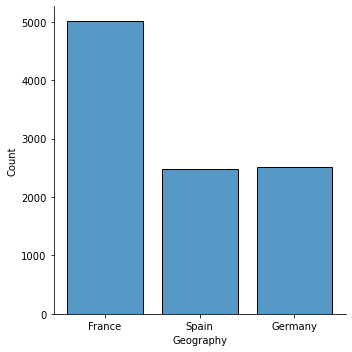

In [5]:
display(df['Geography'].value_counts())
sns.displot(df, x='Geography', shrink=.8)

Male      5457
Female    4543
Name: Gender, dtype: int64

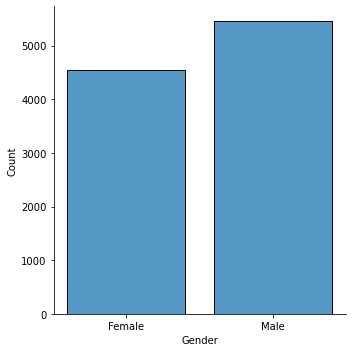

In [6]:
display(df['Gender'].value_counts())
sns.displot(df, x='Gender', shrink=.8)

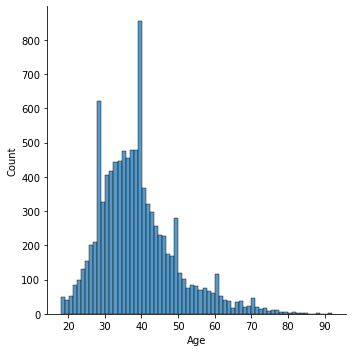

In [7]:
sns.displot(df, x='Age')

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

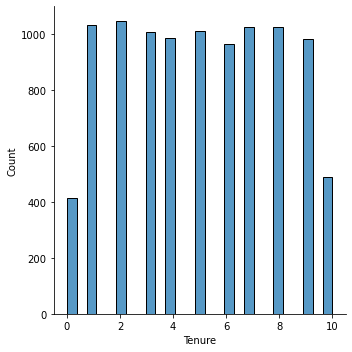

In [8]:
display(df['Tenure'].value_counts())
sns.displot(df, x='Tenure')

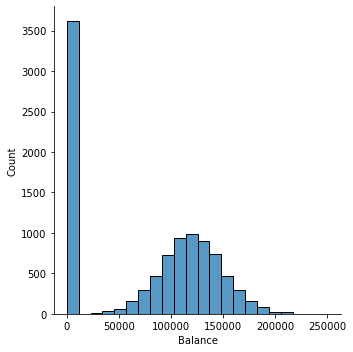

In [9]:
sns.displot(df, x='Balance')

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

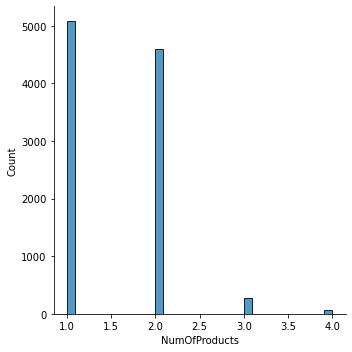

In [10]:
display(df['NumOfProducts'].value_counts())
sns.displot(df, x='NumOfProducts')

1    7055
0    2945
Name: HasCrCard, dtype: int64

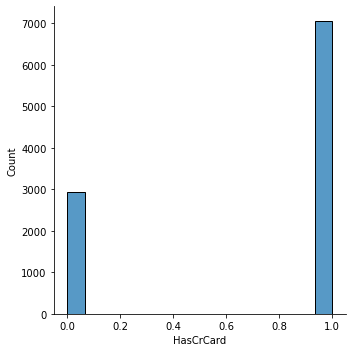

In [11]:
display(df['HasCrCard'].value_counts())
sns.displot(df, x='HasCrCard')

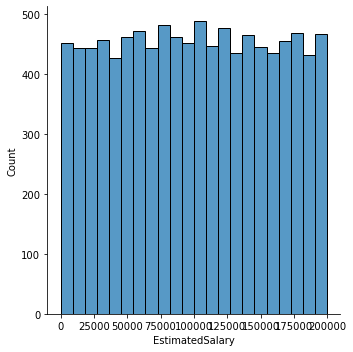

In [12]:
sns.displot(df, x='EstimatedSalary')

0    7963
1    2037
Name: Exited, dtype: int64

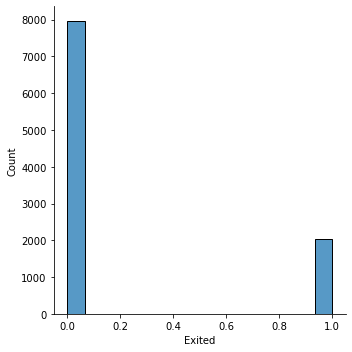

In [13]:
display(df['Exited'].value_counts())
sns.displot(df, x='Exited')

# Data treatment

## Changing categorical variables to continuous

In [14]:
df['Gender'] = df['Gender'].replace({'Female':0,
                                     'Male':1})

df['Geography'] = df['Geography'].replace({'France':0,
                                           'Germany':1,
                                           'Spain':2})